In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine,text
import pymysql

In [3]:


data = pd.read_csv("traffic_stops - traffic_stops_with_vehicle_number.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65538 entries, 0 to 65537
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           65538 non-null  object
 1   stop_time           65538 non-null  object
 2   country_name        65538 non-null  object
 3   driver_gender       65538 non-null  object
 4   driver_age_raw      65538 non-null  int64 
 5   driver_age          65538 non-null  int64 
 6   driver_race         65538 non-null  object
 7   violation_raw       65538 non-null  object
 8   violation           65538 non-null  object
 9   search_conducted    65538 non-null  bool  
 10  search_type         43818 non-null  object
 11  stop_outcome        65538 non-null  object
 12  is_arrested         65538 non-null  bool  
 13  stop_duration       65538 non-null  object
 14  drugs_related_stop  65538 non-null  bool  
 15  vehicle_number      65538 non-null  object
dtypes: bool(3), int64(2), 

C:\Users\Naveen Sabarinath\AppData\Local\Temp\ipykernel_26540\3009654380.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("traffic_stops - traffic_stops_with_vehicle_number.csv")


In [4]:
data.head()
col = [data.columns]
print(col)

[Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'vehicle_number'],
      dtype='object')]


In [5]:

k=data["search_type"].isnull().sum()
r = len(data["search_type"])
print((k/r)*100)


33.141078458299


In [6]:
# need to check if there is any Speed value in any column where it is store 
print(data["search_type"].unique())
r =65538-21720
print("the persentage based on the total is:", r)

['Vehicle Search' 'Frisk' nan]
the persentage based on the total is: 43818


In [7]:
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
0,2020-01-01,0:00:00,Canada,M,59,19,Asian,Drunk Driving,Speeding,True,Vehicle Search,Ticket,True,16-30 Min,True,UP76DY3473
1,2020-01-01,0:01:00,India,M,35,58,Other,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,True,RJ83PZ4441
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
4,2020-01-01,0:04:00,Canada,M,62,75,Other,Speeding,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,WB63BB8305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65533,2020-02-15,12:13:00,India,F,54,48,Black,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,DL56GW6568
65534,2020-02-15,12:14:00,Canada,F,18,35,Hispanic,Seatbelt,Other,True,Vehicle Search,Ticket,False,16-30 Min,True,TN73EO7098
65535,2020-02-15,12:15:00,USA,M,27,41,Asian,Seatbelt,DUI,True,Frisk,Ticket,True,30+ Min,True,GJ33MX8328
65536,2020-02-15,12:16:00,Canada,F,49,63,Black,Seatbelt,Other,False,NaN,Warning,True,0-15 Min,True,KA24UZ8488


In [8]:
from datetime import datetime
k= data["search_type"].isnull().sum()
p = data["stop_time"].max()
print(p)
print(datetime.now())


9:59:00
2025-08-30 12:20:15.496658


In [9]:
df_clean = data.dropna()

df_clean.isnull().sum()

stop_date             0
stop_time             0
country_name          0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
vehicle_number        0
dtype: int64

In [10]:
df_clean 

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
0,2020-01-01,0:00:00,Canada,M,59,19,Asian,Drunk Driving,Speeding,True,Vehicle Search,Ticket,True,16-30 Min,True,UP76DY3473
1,2020-01-01,0:01:00,India,M,35,58,Other,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,True,RJ83PZ4441
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
4,2020-01-01,0:04:00,Canada,M,62,75,Other,Speeding,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,WB63BB8305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,2020-02-15,12:11:00,India,M,47,70,Hispanic,Seatbelt,Signal,False,Vehicle Search,Ticket,True,16-30 Min,True,WB25SO5088
65532,2020-02-15,12:12:00,India,M,50,62,White,Other,Seatbelt,True,Frisk,Arrest,True,30+ Min,True,KA83LM2787
65533,2020-02-15,12:13:00,India,F,54,48,Black,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,DL56GW6568
65534,2020-02-15,12:14:00,Canada,F,18,35,Hispanic,Seatbelt,Other,True,Vehicle Search,Ticket,False,16-30 Min,True,TN73EO7098


Text(0, 0.5, 'Frequency')

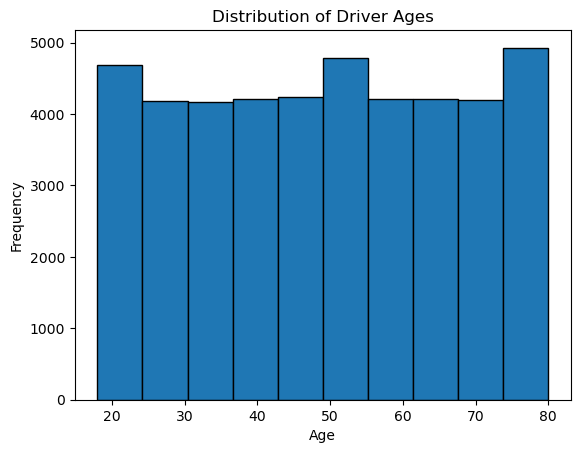

In [11]:
plt.hist(df_clean["driver_age"], bins=10, edgecolor='black')
plt.title("Distribution of Driver Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")


In [ ]:
from urllib.parse import quote_plus


USER = "root"
PASSWORD = "root"
PASSWORD_ENC = quote_plus(PASSWORD)
HOST = "localhost"
PORT = 3306
DATABASE = "traffic_stops"

root_engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD_ENC}@{HOST}:{PORT}/?charset=utf8mb4")
with root_engine.connect() as connection:
    connection.execute(text(f"CREATE DATABASE IF NOT EXISTS `{DATABASE}`" f"DEFAULT CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;"))


engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD_ENC}@{HOST}:{PORT}/{DATABASE}?charset=utf8mb4",pool_recycle=3600,pool_pre_ping=True)

table_name = "police"

df_clean.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

print("done")

done


43818